In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [2]:
df_lap = pd.read_json("laptop_details.json")

In [4]:
df_lap.head(10)

,name,product_summary,product_tech_spec,product_addl_info,seller,seller_link,freq_bought,freq_bought_link,link_to_all_reviews
0,"CHUWI HeroBook Pro+ Laptop,13.3” 3200x1800 Res...","[{'info': 'Brand', 'value': 'CHUWI'}, {'info':...","[{'info': 'Standing screen display size', 'val...","[{'info': 'ASIN', 'value': 'B08W2VYYVX'}, {'in...",CHUWI,https://www.amazon.com/gp/help/seller/at-a-gla...,None,None,/CHUWI-HeroBook-Pro-3200x1800-Resolution/produ...
1,HP Chromebook 11 G5 11.6 inches Chromebook - I...,"[{'info': 'Brand', 'value': 'HP'}, {'info': 'S...","[{'info': 'Standing screen display size', 'val...","[{'info': 'ASIN', 'value': 'B07NPXCH6Q'}, {'in...",KT Renewed,https://www.amazon.com/gp/help/seller/at-a-gla...,None,None,/HP-Chromebook-11-6-Dual-core-Refurbished/prod...
2,"HP 15 Laptop, 11th Gen Intel Core i5-1135G7 Pr...","[{'info': 'Brand', 'value': 'HP'}, {'info': 'S...","[{'info': 'Standing screen display size', 'val...","[{'info': 'ASIN', 'value': 'B08KGZ79N6'}, {'in...",CAC Store,https://www.amazon.com/gp/help/seller/at-a-gla...,VicTsing MM057 2.4G Wireless Portable Mobile M...,https://www.amazon.com/VicTsing-Wireless-Porta...,/HP-i5-1135G7-Processor-Lightweight-15-dy2021n...
3,"HP Chromebook 14-inch HD Laptop, Intel Celeron...","[{'info': 'Brand', 'value': 'HP'}, {'info': 'S...","[{'info': 'Standing screen display size', 'val...","[{'info': 'ASIN', 'value': 'B08529TZMC'}, {'in...",None,None,None,None,/HP-Chromebook-14-inch-Celeron-14a-na0010nr/pr...
4,"ASUS Laptop L210 Ultra Thin Laptop, 11.6” HD D...","[{'info': 'Brand', 'value': 'ASUS'}, {'info': ...","[{'info': 'Standing screen display size', 'val...","[{'info': 'ASIN', 'value': 'B081V6W99V'}, {'in...",BroadElectronics,https://www.amazon.com/gp/help/seller/at-a-gla...,None,None,/ASUS-Processor-NumberPad-Microsoft-L210MA-DB0...
5,"2021 Lenovo ThinkPad E14 Laptop 14"" FHD Busine...","[{'info': 'Brand', 'value': 'Lenovo'}, {'info'...","[{'info': 'Standing screen display size', 'val...","[{'info': 'ASIN', 'value': 'B08YJJ9DXD'}, {'in...",AMAZING WAREHOUSE DEAL(Record SN),https://www.amazon.com/gp/help/seller/at-a-gla...,None,None,/Lenovo-ThinkPad-i5-10210U-Bluetooth-Accessori...
6,Used Well Chromebook 14 SMB Lightweight Laptop...,"[{'info': 'Brand', 'value': 'KJD'}, {'info': '...","[{'info': 'Standing screen display size', 'val...","[{'info': 'ASIN', 'value': 'B08NDWGV8B'}, {'in...",GoldenRice Computer,https://www.amazon.com/gp/help/seller/at-a-gla...,None,None,/Chromebook-Lightweight-Computer-Business-Educ...
7,HP Pavilion 15-CS Intel i5-1035G1 12GB 512GB S...,"[{'info': 'Brand', 'value': 'HP'}, {'info': 'S...","[{'info': 'Standing screen display size', 'val...","[{'info': 'ASIN', 'value': 'B087SD98F4'}, {'in...",Deal-Express,https://www.amazon.com/gp/help/seller/at-a-gla...,VicTsing MM057 2.4G Wireless Portable Mobile M...,https://www.amazon.com/VicTsing-Wireless-Porta...,/HP-Pavilion-Touchscreen-i5-1035G1-Wireless-AC...
8,None,None,None,None,None,None,None,None,None
9,"HP 15 Laptop, AMD Ryzen 3 3250U Processor, 8 G...","[{'info': 'Brand', 'value': 'HP'}, {'info': 'S...","[{'info': 'Standing screen display size', 'val...","[{'info': 'ASIN', 'value': 'B08N38VPL7'}, {'in...",Regulus Electronics,https://www.amazon.com/gp/help/seller/at-a-gla...,VicTsing MM057 2.4G Wireless Portable Mobile M...,https://www.amazon.com/VicTsing-Wireless-Porta...,/HP-Processor-Micro-Edge-Long-Lasting-15-ef102...


In [3]:
df_lap.dtypes

name                   object
product_summary        object
product_tech_spec      object
product_addl_info      object
seller                 object
seller_link            object
freq_bought            object
freq_bought_link       object
link_to_all_reviews    object
dtype: object

In [6]:
df_lap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 5419 non-null   object
 1   product_summary      5095 non-null   object
 2   product_tech_spec    5166 non-null   object
 3   product_addl_info    5400 non-null   object
 4   seller               2585 non-null   object
 5   seller_link          2585 non-null   object
 6   freq_bought          899 non-null    object
 7   freq_bought_link     899 non-null    object
 8   link_to_all_reviews  3722 non-null   object
dtypes: object(9)
memory usage: 397.5+ KB


In [7]:
df_lap.isnull().sum()

name                    233
product_summary         557
product_tech_spec       486
product_addl_info       252
seller                 3067
seller_link            3067
freq_bought            4753
freq_bought_link       4753
link_to_all_reviews    1930
dtype: int64

In [8]:
# we need to make the following datas out of it (ASIN,	Best Sellers Rank,	Product Dimensions,	Package Dimensions,	Item Weight,	Date First Available,	Is Discontinued By Manufacturer,	Item model number,	Batteries,	Card Description,	Voltage	Series,	National Stock Number,	Chipset Brand,	Date First Available,	Batteries Required?,	Wireless Type,	Standing screen display size,	Max Screen Resolution,	Part Number,	Item Package Quantity,	Color,	Brand,	Number of USB 3.0 Ports,	Memory Speed)

In [5]:
# frequently bought dataframe (ASIN,title,freq_bought)

In [9]:

# drop values with no name

df_lap.dropna(subset=["name"],inplace=True)

In [10]:
# some values are repeated over and over (sponsored items on amazon.com) - preparing a small df for visualization of this values

repeat = df_lap.name
repeat = repeat.value_counts().to_frame()
repeat.reset_index(inplace=True)
repeat.columns=["Product_Name","Value"]
top_repeated= repeat.head(10)
top_repeated

,Product_Name,Value
0,Jumper Laptop 13.3 inch 8GB RAM 128GB ROM Quad...,172
1,Laptop Computers 14-Inch Windows-10 Notebook -...,137
2,"Laptop 14 Inch, Winnovo N140, 6GB RAM, 128GB S...",108
3,"Laptop 14 Inch, Winnovo N140, 6GB RAM, 128GB S...",105
4,Laptop Backpack Travel Backpack for Men And Wo...,92
5,HP Chromebook 11 G5 11.6 inches Chromebook - I...,90
6,"CHUWI HeroBook Pro+ Laptop,13.3” 3200x1800 Res...",74
7,"Laptop 14.1 inch notebook computer, IPS displa...",73
8,Used Well Chromebook 14 SMB Lightweight Laptop...,66
9,"iProda 14inch Laptop, Intel i3 Notebook (up to...",56


In [11]:
top_repeated.dtypes

Product_Name    object
Value            int64
dtype: object

<AxesSubplot:>

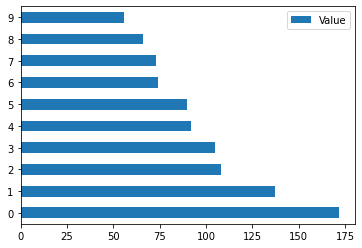

In [13]:
top_repeated.plot(kind="barh")

In [14]:

list(top_repeated.Product_Name)

['Jumper Laptop 13.3 inch 8GB RAM 128GB ROM Quad Core Celeron, Windows 10 Thin and Light Laptop, Full HD 1080P Display, Support 128GB TF Cardand 1TB SSD Expansion',
 'Laptop Computers 14-Inch Windows-10 Notebook - WinBook Intel Celeron Processor 6GB RAM 64GB ROM HD IPS Display Dual Band WiFi Numeric Touchpad Removal Webcam HDMI (Grey)',
 'Laptop 14 Inch, Winnovo N140, 6GB RAM, 128GB SSD, Intel Celeron Processor, FHD IPS Display, Dual Band WiFi, Numeric Keypad (Grey)',
 'Laptop 14 Inch, Winnovo N140, 6GB RAM, 128GB SSD, Intel Celeron Processor, HD IPS Display, Windows 10, Touch Numeric Keypad, Dual Band WiFi, Grey',
 'Laptop Backpack Travel Backpack for Men And Women Business Water Resistant Laptops Backpack and USB Charging Port, Travel Computer Bag for 15.6 Inch Laptops,Iron Grey',
 'HP Chromebook 11 G5 11.6 inches Chromebook - Intel Celeron N3050 Dual-core (2 Core) 1.60 GHz (Renewed)',
 'CHUWI HeroBook Pro+ Laptop,13.3” 3200x1800 Resolution Windows 10 Laptop,Intel Celeron J3455 Quad 

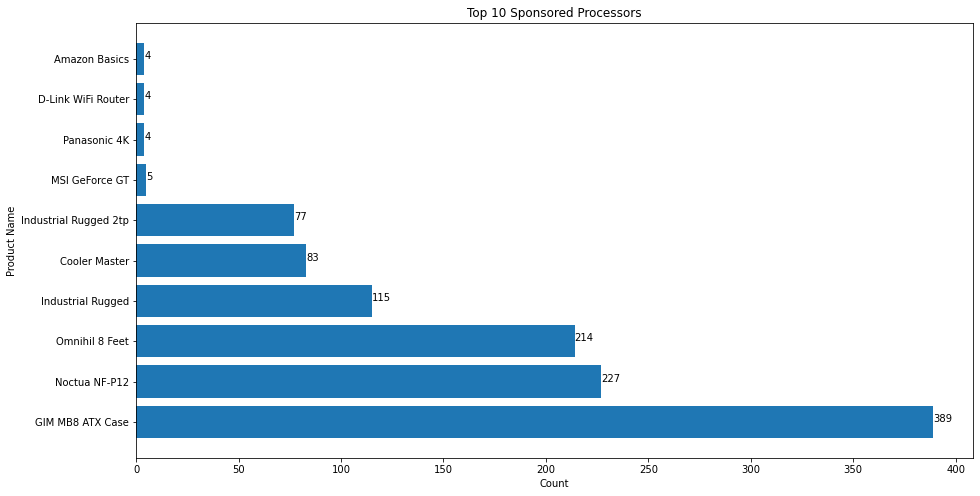

In [15]:
# Top 10 Sponsored Processors

x=['GIM MB8 ATX Case', 'Noctua NF-P12', 'Omnihil 8 Feet',
 'Industrial Rugged',
 'Cooler Master',
 'Industrial Rugged 2tp',
 'MSI GeForce GT',
 'Panasonic 4K',
 'D-Link WiFi Router',
 'Amazon Basics']
y=[389, 227, 214, 115, 83, 77, 5, 4, 4, 4]
plt.figure(figsize=(15,8))
fig= plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.ylabel('Product Name')
plt.xlabel('Count')
plt.title('Top 10 Sponsored Processors')
plt.savefig("Top 10 Sponsored Processors.png", dpi=80)

In [16]:

## Extracting data from nests

# At index 0 column product_tech_spec, a processor looks like this. How to extract the data from such a nest? 

df_lap.product_tech_spec[0]

[{'info': 'Standing screen display size', 'value': '13.3 Inches'},
 {'info': 'Max Screen Resolution', 'value': '3000 x 1800 Lines Per Inch'},
 {'info': 'Processor', 'value': '2.3 GHz celeron_j3455'},
 {'info': 'RAM', 'value': '8 GB'},
 {'info': 'Hard Drive', 'value': '128 GB HDD 5400 rpm'},
 {'info': 'Graphics Coprocessor', 'value': 'Intel Celeron J3455'},
 {'info': 'Chipset Brand', 'value': 'Intel'},
 {'info': 'Wireless Type', 'value': 'Bluetooth'}]

In [17]:
df_lap.product_tech_spec[0][0]

{'info': 'Standing screen display size', 'value': '13.3 Inches'}

In [18]:

df_lap.product_tech_spec[0][0]["info"]

'Standing screen display size'

In [19]:

# shows no results cause the value is Nan

#df_lap.iloc[0]["product_addl_info"]
# just another way to access the data in the "cells"

df_lap.iloc[1]["product_addl_info"]

[{'info': 'ASIN', 'value': 'B07NPXCH6Q'},
 {'info': 'Customer Reviews',
  'value': '/*\n* Fix for UDP-1061. Average customer reviews has a small extra line on hover\n* https://omni-grok.amazon.com/xref/src/appgroup/websiteTemplates/retail/SoftlinesDetailPageAssets/udp-intl-lock/src/legacy.css?indexName=WebsiteTemplates#40\n*/\n.noUnderline a:hover {\ntext-decoration: none;\n} 4.0 out of 5 stars 52 ratings P.when(\'A\', \'ready\').execute(function(A) {\nA.declarative(\'acrLink-click-metrics\', \'click\', { "allowLinkDefault" : true }, function(event){\nif(window.ue) {\nue.count("acrLinkClickCount", (ue.count("acrLinkClickCount") || 0) + 1);\n}\n});\n}); P.when(\'A\', \'cf\').execute(function(A) {\nA.declarative(\'acrStarsLink-click-metrics\', \'click\', { "allowLinkDefault" : true },  function(event){\nif(window.ue) {\nue.count("acrStarsLinkWithPopoverClickCount", (ue.count("acrStarsLinkWithPopoverClickCount") || 0) + 1);\n}\n});\n}); 4.0 out of 5 stars'},
 {'info': 'Best Sellers Rank',

In [20]:
df_lap.iloc[3]["product_addl_info"]

[{'info': 'ASIN', 'value': 'B08529TZMC'},
 {'info': 'Customer Reviews',
  'value': '/*\n* Fix for UDP-1061. Average customer reviews has a small extra line on hover\n* https://omni-grok.amazon.com/xref/src/appgroup/websiteTemplates/retail/SoftlinesDetailPageAssets/udp-intl-lock/src/legacy.css?indexName=WebsiteTemplates#40\n*/\n.noUnderline a:hover {\ntext-decoration: none;\n} 4.5 out of 5 stars 3,668 ratings P.when(\'A\', \'ready\').execute(function(A) {\nA.declarative(\'acrLink-click-metrics\', \'click\', { "allowLinkDefault" : true }, function(event){\nif(window.ue) {\nue.count("acrLinkClickCount", (ue.count("acrLinkClickCount") || 0) + 1);\n}\n});\n}); P.when(\'A\', \'cf\').execute(function(A) {\nA.declarative(\'acrStarsLink-click-metrics\', \'click\', { "allowLinkDefault" : true },  function(event){\nif(window.ue) {\nue.count("acrStarsLinkWithPopoverClickCount", (ue.count("acrStarsLinkWithPopoverClickCount") || 0) + 1);\n}\n});\n}); 4.5 out of 5 stars'},
 {'info': 'Best Sellers Ran

In [21]:

# TECH SPECIFICATION - column
# 
# iteration through all rows
# iteration through all cells
# extract from all cells of all rows values corresponding to keyword "info" and append it in empty columns list
# to make sure code keeps running if it encounters Nan values I will add try -except (continue)
# keep just unique values
# print it

columns=[]
for i in range(len(df_lap)):
    try:
        for j in df_lap.product_tech_spec[i]:
            columns.append(j["info"])
    except:
        continue

columns=list(set(columns))
print(columns)

['Brand', 'Item model number', 'Wireless Type', 'Item Weight', 'Processor', 'Hardware Platform', 'Product Dimensions', 'RAM', 'National Stock Number', 'Series', 'Memory Speed', 'Rear Webcam Resolution', 'Date First Available', 'Hard Drive', 'Package Dimensions', 'Graphics Card Ram Size', 'Average Battery Life (in hours)', 'Brand Name', 'Color', 'Size', 'Color Name', 'Item Dimensions  LxWxH', 'Number of USB 3.0 Ports', 'Manufacturer', 'Chipset Brand', 'Card Description', 'Batteries', 'Standing screen display size', 'Graphics Coprocessor', 'Screen Resolution', 'Speaker Type', 'ASIN', 'Max Screen Resolution', 'Number of USB 2.0 Ports', 'Manufacturer Part Number', 'Is Discontinued By Manufacturer']


In [22]:
# create new df with columns extracted

product_tech_spec = pd.DataFrame(columns=columns)
product_tech_spec

,Brand,Item model number,Wireless Type,Item Weight,Processor,Hardware Platform,Product Dimensions,RAM,National Stock Number,Series,Memory Speed,Rear Webcam Resolution,Date First Available,Hard Drive,Package Dimensions,Graphics Card Ram Size,Average Battery Life (in hours),Brand Name,Color,Size,Color Name,Item Dimensions LxWxH,Number of USB 3.0 Ports,Manufacturer,Chipset Brand,Card Description,Batteries,Standing screen display size,Graphics Coprocessor,Screen Resolution,Speaker Type,ASIN,Max Screen Resolution,Number of USB 2.0 Ports,Manufacturer Part Number,Is Discontinued By Manufacturer


In [23]:
# the iteration is now through all rows of the df and all cells
# the data will be then locked in the respective cells

for i in range(len(df_lap)):
    try:
        for j in df_lap.product_tech_spec[i]:
            product_tech_spec.loc[i,j["info"]] = j["value"]
    except:
        product_tech_spec.loc[i,j["info"]] = ""
        continue

In [24]:

# a look at the new df created by the extraction of all values in the column product_tech_spec

product_tech_spec.head()

,Brand,Item model number,Wireless Type,Item Weight,Processor,Hardware Platform,Product Dimensions,RAM,National Stock Number,Series,Memory Speed,Rear Webcam Resolution,Date First Available,Hard Drive,Package Dimensions,Graphics Card Ram Size,Average Battery Life (in hours),Brand Name,Color,Size,Color Name,Item Dimensions LxWxH,Number of USB 3.0 Ports,Manufacturer,Chipset Brand,Card Description,Batteries,Standing screen display size,Graphics Coprocessor,Screen Resolution,Speaker Type,ASIN,Max Screen Resolution,Number of USB 2.0 Ports,Manufacturer Part Number,Is Discontinued By Manufacturer
0,NaN,NaN,Bluetooth,NaN,2.3 GHz celeron_j3455,NaN,NaN,8 GB,NaN,NaN,NaN,NaN,NaN,128 GB HDD 5400 rpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,NaN,NaN,13.3 Inches,Intel Celeron J3455,NaN,NaN,NaN,3000 x 1800 Lines Per Inch,NaN,NaN,NaN
1,NaN,NaN,802.11abg,NaN,1.6 GHz 8032,NaN,NaN,16 GB LPDDR3,NaN,NaN,1600 MHz,NaN,NaN,Flash Memory Solid State,NaN,NaN,12.83 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,Integrated,NaN,11.6 Inches,Intel HD Graphics 400,NaN,NaN,NaN,1366 x 768 Pixels,NaN,NaN,NaN
2,NaN,NaN,"Bluetooth, 802.11ax",NaN,4.2 GHz core_i5,NaN,NaN,8 GB DDR4,NaN,NaN,NaN,NaN,NaN,SSD,NaN,NaN,8 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,Integrated,NaN,15.6 Inches,Intel Iris,1920 x 1080 pixels,NaN,NaN,1920 x 1080 Pixels,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.1 GHz celeron_n,NaN,NaN,4 GB LPDDR4,NaN,NaN,2.6 GHz,NaN,NaN,Embedded MultiMediaCard,NaN,NaN,13.5 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,Integrated,NaN,14 Inches,NaN,NaN,NaN,NaN,1366 x 768 Pixels,NaN,NaN,NaN
4,NaN,NaN,"Bluetooth, 802.11ac",NaN,2.8 GHz celeron,NaN,NaN,4 GB DDR4,NaN,NaN,2.8 GHz,NaN,NaN,64 GB Embedded MultiMediaCard,NaN,4 GB,12 Hours,NaN,NaN,NaN,NaN,NaN,2,NaN,Intel,Integrated,NaN,11.6 Inches,Intel UHD Graphics 600,NaN,NaN,NaN,1366 x 768 Pixels,1,NaN,NaN


In [25]:
#check on null values

product_tech_spec.notnull().sum()

Brand                                49
Item model number                    17
Wireless Type                      4530
Item Weight                          51
Processor                          4836
Hardware Platform                     3
Product Dimensions                   20
RAM                                4746
National Stock Number                98
Series                                1
Memory Speed                       3208
Rear Webcam Resolution                3
Date First Available                 13
Hard Drive                         4875
Package Dimensions                   31
Graphics Card Ram Size             1016
Average Battery Life (in hours)    1860
Brand Name                            6
Color                                 8
Size                                 35
Color Name                            6
Item Dimensions  LxWxH                4
Number of USB 3.0 Ports            1263
Manufacturer                         49
Chipset Brand                      3973


In [26]:
# The same process must be repeated throughout the other columns where the data is nested
# 
# Here I used the shape columns[0] instead(shape is shown with [columns, rows] and I only need the columns) instead of the length of the df

columns=[]
for i in range(df_lap.shape[0]):
    try:
        for j in df_lap.product_addl_info[i]:
            columns.append(j["info"])
    except:
        continue

columns= list(set(columns))
print(columns)

['Display resolution', 'Item model number', 'Item Weight', 'Form Factor', 'Product Dimensions', 'RAM', 'National Stock Number', 'Department', 'Wireless communication technologies', 'Date First Available', 'Other display features', 'Package Dimensions', 'Batteries Required?', 'Colour', 'Warranty Description', 'Other camera features', 'Manufacturer', 'Batteries', 'Display technology', 'Customer Reviews', 'Device interface - primary', 'Specific Uses For Product', 'ASIN', 'Best Sellers Rank', 'OS', 'GPU', 'Is Discontinued By Manufacturer', 'Included Components']


In [27]:

 product_addl_info = pd.DataFrame(columns=columns)
product_addl_info

,Display resolution,Item model number,Item Weight,Form Factor,Product Dimensions,RAM,National Stock Number,Department,Wireless communication technologies,Date First Available,Other display features,Package Dimensions,Batteries Required?,Colour,Warranty Description,Other camera features,Manufacturer,Batteries,Display technology,Customer Reviews,Device interface - primary,Specific Uses For Product,ASIN,Best Sellers Rank,OS,GPU,Is Discontinued By Manufacturer,Included Components


In [28]:
for i in range(df_lap.shape[0]):
    try:
        for j in df_lap.product_addl_info[i]:
            product_addl_info.loc[i,j["info"]] = j["value"]
    except:
        product_addl_info.loc[i,j["info"]] = ""
        continue

In [29]:
product_addl_info.head()

,Display resolution,Item model number,Item Weight,Form Factor,Product Dimensions,RAM,National Stock Number,Department,Wireless communication technologies,Date First Available,Other display features,Package Dimensions,Batteries Required?,Colour,Warranty Description,Other camera features,Manufacturer,Batteries,Display technology,Customer Reviews,Device interface - primary,Specific Uses For Product,ASIN,Best Sellers Rank,OS,GPU,Is Discontinued By Manufacturer,Included Components
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"February 6, 2021",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,B08W2VYYVX,"#1,944 in Computers & Accessories ( See Top 10...",NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"February 13, 2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,B07NPXCH6Q,"#5,305 in Computers & Accessories ( See Top 10...",NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"October 23, 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,B08KGZ79N6,#65 in Computers & Accessories ( See Top 100 i...,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"April 19, 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,B08529TZMC,#78 in Computers & Accessories ( See Top 100 i...,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"October 5, 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,B081V6W99V,#18 in Computers & Accessories ( See Top 100 i...,NaN,NaN,NaN,NaN


In [30]:
# last extraction of the data from column product_summary

columns=[]
for i in range(df_lap.shape[0]):
    try:
        for j in df_lap.product_summary[i]:
            columns.append(j["info"])
    except:
        continue

columns=list(set(columns))
columns

['Hard Drive Rotational Speed',
 'Brand',
 'Item model number',
 'Item Weight',
 'Hardware Platform',
 'Product Dimensions',
 'Series',
 'National Stock Number',
 'Rear Webcam Resolution',
 'Date First Available',
 'Power Source',
 'Package Dimensions',
 'Processor Count',
 'tech_spec_battery_description_toys',
 'Color',
 'Operating System',
 'Item Dimensions  LxWxH',
 'Manufacturer',
 'Computer Memory Type',
 'Audio-out Ports (#)',
 'Batteries',
 'Processor Brand',
 'Hard Drive Interface',
 'Optical Drive Type',
 'ASIN',
 'Voltage',
 'Is Discontinued By Manufacturer',
 'Flash Memory Size']

In [31]:

product_summary = pd.DataFrame(columns=columns)
product_summary

,Hard Drive Rotational Speed,Brand,Item model number,Item Weight,Hardware Platform,Product Dimensions,Series,National Stock Number,Rear Webcam Resolution,Date First Available,Power Source,Package Dimensions,Processor Count,tech_spec_battery_description_toys,Color,Operating System,Item Dimensions LxWxH,Manufacturer,Computer Memory Type,Audio-out Ports (#),Batteries,Processor Brand,Hard Drive Interface,Optical Drive Type,ASIN,Voltage,Is Discontinued By Manufacturer,Flash Memory Size


In [32]:

for i in range(df_lap.shape[0]):
    try:
        for j in df_lap.product_summary[i]:
            product_summary.loc[i,j["info"]] = j["value"]
    except:
        product_summary.loc[i,j["info"]] = ""
        continue

product_summary.head()

,Hard Drive Rotational Speed,Brand,Item model number,Item Weight,Hardware Platform,Product Dimensions,Series,National Stock Number,Rear Webcam Resolution,Date First Available,Power Source,Package Dimensions,Processor Count,tech_spec_battery_description_toys,Color,Operating System,Item Dimensions LxWxH,Manufacturer,Computer Memory Type,Audio-out Ports (#),Batteries,Processor Brand,Hard Drive Interface,Optical Drive Type,ASIN,Voltage,Is Discontinued By Manufacturer,Flash Memory Size
0,7200.00,CHUWI,HeroBook Pro+,3.67 pounds,PC,13.15 x 8.43 x 0.84 inches,NaN,NaN,NaN,NaN,Battery Powered,NaN,4,NaN,Silver,Windows 10,13.15 x 8.43 x 0.84 inches,NaN,DDR4 SDRAM,NaN,NaN,Intel,ATA133,NaN,NaN,NaN,NaN,128 GB
1,NaN,HP,N3060,2.49 pounds,Chrome OS,7.8 x 12 x 0.8 inches,HP Chromebook,NaN,NaN,NaN,NaN,NaN,2,NaN,Black,Chrome OS,7.8 x 12 x 0.8 inches,NaN,Unknown,NaN,1 Lithium ion batteries required. (included),Intel,Unknown,NaN,NaN,NaN,NaN,16
2,5400 RPM,HP,15-dy2021nr,3.75 pounds,PC,14.11 x 9.53 x 0.71 inches,HP 15 Laptop,NaN,NaN,NaN,Battery Powered,NaN,4,NaN,Natural Silver,Windows 10 Home,14.11 x 9.53 x 0.71 inches,NaN,DDR4 SDRAM,NaN,1 Lithium ion batteries required. (included),Intel,Gigabit Ethernet,No Optical Drive,NaN,NaN,NaN,256
3,NaN,HP,14a-na0010nr,3.2 pounds,NaN,12.82 x 8.6 x 0.7 inches,Chromebook,NaN,NaN,NaN,Battery Powered,NaN,2,NaN,Mineral Silver,Chrome OS,12.82 x 8.6 x 0.7 inches,NaN,DDR4 SDRAM,NaN,1 Lithium Polymer batteries required. (included),Intel,NaN,No Optical Drive,NaN,NaN,NaN,4
4,NaN,ASUS,L210MA-DB01,2.31 pounds,PC,11 x 7.5 x 0.67 inches,ASUS Laptop L210MA,NaN,NaN,NaN,Battery Powered,NaN,2,NaN,Black,Windows 10 S,11 x 7.5 x 0.67 inches,NaN,DDR4 SDRAM,NaN,1 Lithium Metal batteries required. (included),Intel,NaN,No Optical Drive,NaN,19 Volts,NaN,64


In [68]:
# The created dfs will be now concatenated together with the remaining columns of the original df, the concatenation will be based on the axis 1(columns)

laptop_product = pd.concat([pd.DataFrame(df_lap.name),product_tech_spec,product_summary,product_addl_info,pd.DataFrame(df_lap.name),pd.DataFrame(df_lap.seller),pd.DataFrame(df_lap.seller_link)], axis=1)
laptop_product.head()

,name,Brand,Item model number,Wireless Type,Item Weight,Processor,Hardware Platform,Product Dimensions,RAM,National Stock Number,Series,Memory Speed,Rear Webcam Resolution,Date First Available,Hard Drive,Package Dimensions,Graphics Card Ram Size,Average Battery Life (in hours),Brand Name,Color,Size,Color Name,Item Dimensions LxWxH,Number of USB 3.0 Ports,Manufacturer,Chipset Brand,Card Description,Batteries,Standing screen display size,Graphics Coprocessor,Screen Resolution,Speaker Type,ASIN,Max Screen Resolution,Number of USB 2.0 Ports,Manufacturer Part Number,Is Discontinued By Manufacturer,Hard Drive Rotational Speed,Brand,Item model number,Item Weight,Hardware Platform,Product Dimensions,Series,National Stock Number,Rear Webcam Resolution,Date First Available,Power Source,Package Dimensions,Processor Count,tech_spec_battery_description_toys,Color,Operating System,Item Dimensions LxWxH,Manufacturer,Computer Memory Type,Audio-out Ports (#),Batteries,Processor Brand,Hard Drive Interface,Optical Drive Type,ASIN,Voltage,Is Discontinued By Manufacturer,Flash Memory Size,Display resolution,Item model number,Item Weight,Form Factor,Product Dimensions,RAM,National Stock Number,Department,Wireless communication technologies,Date First Available,Other display features,Package Dimensions,Batteries Required?,Colour,Warranty Description,Other camera features,Manufacturer,Batteries,Display technology,Customer Reviews,Device interface - primary,Specific Uses For Product,ASIN,Best Sellers Rank,OS,GPU,Is Discontinued By Manufacturer,Included Components,name,seller,seller_link
0,"CHUWI HeroBook Pro+ Laptop,13.3” 3200x1800 Res...",NaN,NaN,Bluetooth,NaN,2.3 GHz celeron_j3455,NaN,NaN,8 GB,NaN,NaN,NaN,NaN,NaN,128 GB HDD 5400 rpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,NaN,NaN,13.3 Inches,Intel Celeron J3455,NaN,NaN,NaN,3000 x 1800 Lines Per Inch,NaN,NaN,NaN,7200.00,CHUWI,HeroBook Pro+,3.67 pounds,PC,13.15 x 8.43 x 0.84 inches,NaN,NaN,NaN,NaN,Battery Powered,NaN,4,NaN,Silver,Windows 10,13.15 x 8.43 x 0.84 inches,NaN,DDR4 SDRAM,NaN,NaN,Intel,ATA133,NaN,NaN,NaN,NaN,128 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"February 6, 2021",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,B08W2VYYVX,"#1,944 in Computers & Accessories ( See Top 10...",NaN,NaN,NaN,NaN,"CHUWI HeroBook Pro+ Laptop,13.3” 3200x1800 Res...",CHUWI,https://www.amazon.com/gp/help/seller/at-a-gla...
1,HP Chromebook 11 G5 11.6 inches Chromebook - I...,NaN,NaN,802.11abg,NaN,1.6 GHz 8032,NaN,NaN,16 GB LPDDR3,NaN,NaN,1600 MHz,NaN,NaN,Flash Memory Solid State,NaN,NaN,12.83 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,Integrated,NaN,11.6 Inches,Intel HD Graphics 400,NaN,NaN,NaN,1366 x 768 Pixels,NaN,NaN,NaN,NaN,HP,N3060,2.49 pounds,Chrome OS,7.8 x 12 x 0.8 inches,HP Chromebook,NaN,NaN,NaN,NaN,NaN,2,NaN,Black,Chrome OS,7.8 x 12 x 0.8 inches,NaN,Unknown,NaN,1 Lithium ion batteries required. (included),Intel,Unknown,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"February 13, 2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,B07NPXCH6Q,"#5,305 in Computers & Accessories ( See Top 10...",NaN,NaN,NaN,NaN,HP Chromebook 11 G5 11.6 inches Chromebook - I...,KT Renewed,https://www.amazon.com/gp/help/seller/at-a-gla...
2,"HP 15 Laptop, 11th Gen Intel Core i5-1135G7 Pr...",NaN,NaN,"Bluetooth, 802.11ax",NaN,4.2 GHz core_i5,NaN,NaN,8 GB DDR4,NaN,NaN,NaN,NaN,NaN,SSD,NaN,NaN,8 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,Integrated,NaN,15.6 Inches,Intel Iris,1920 x 1080 pixels,NaN,NaN,1920 x 1080 Pixels,NaN,NaN,NaN,5400 RPM,HP,15-dy2021nr,3.75 pounds,PC,14.11 x 9.53 x 0.71 inches,HP 15 Laptop,NaN,NaN,NaN,Battery Powered,NaN,4,NaN,Natural Silver,Windows 10 Home,14.11 x 9.53 x 0.71 inches,NaN,DDR4 SDRAM,NaN,1 Lithium ion batteries required. (included),Intel,Gigabit Ethernet,No Optical Drive,NaN,NaN,NaN,256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"October 23, 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-106

In [64]:
laptop_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5195 entries, 0 to 5194
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ASIN                             5195 non-null   object 
 1   Average Battery Life (in hours)  1783 non-null   object 
 2   Batteries                        3557 non-null   object 
 3   Brand                            4947 non-null   object 
 4   Card Description                 3781 non-null   object 
 5   Chipset Brand                    3968 non-null   object 
 6   Color                            3068 non-null   object 
 7   Computer Memory Type             4612 non-null   object 
 8   Customer Reviews                 4041 non-null   object 
 9   Date First Available             5102 non-null   object 
 10  Flash Memory Size                3285 non-null   object 
 11  Graphics Card Ram Size           1015 non-null   object 
 12  Graphics Coprocessor

In [65]:
df_lap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5419 entries, 0 to 5651
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 5419 non-null   object
 1   product_summary      5095 non-null   object
 2   product_tech_spec    5166 non-null   object
 3   product_addl_info    5400 non-null   object
 4   seller               2584 non-null   object
 5   seller_link          2584 non-null   object
 6   freq_bought          899 non-null    object
 7   freq_bought_link     899 non-null    object
 8   link_to_all_reviews  3722 non-null   object
dtypes: object(9)
memory usage: 583.4+ KB


In [34]:

laptop_product.columns.unique()[(laptop_product.columns.value_counts().sort_values(ascending=False)>1).values]

Index(['name', 'Brand', 'Item model number', 'Wireless Type', 'Item Weight',
       'Processor', 'Hardware Platform', 'Product Dimensions', 'RAM',
       'National Stock Number', 'Series', 'Memory Speed',
       'Rear Webcam Resolution', 'Date First Available', 'Hard Drive',
       'Package Dimensions', 'Graphics Card Ram Size',
       'Average Battery Life (in hours)'],
      dtype='object')

In [35]:

# through a groupby of the new df on the columns (axis=1) I will reduce the number of columns by removing the duplicates and keeping just the first one that will have all possible values(null values filled in from duplicates where possible)

laptop_product = laptop_product.groupby(laptop_product.columns,axis=1).first()
laptop_product.head()

,ASIN,Audio-out Ports (#),Average Battery Life (in hours),Batteries,Batteries Required?,Best Sellers Rank,Brand,Brand Name,Card Description,Chipset Brand,Color,Color Name,Colour,Computer Memory Type,Customer Reviews,Date First Available,Department,Device interface - primary,Display resolution,Display technology,Flash Memory Size,Form Factor,GPU,Graphics Card Ram Size,Graphics Coprocessor,Hard Drive,Hard Drive Interface,Hard Drive Rotational Speed,Hardware Platform,Included Components,Is Discontinued By Manufacturer,Item Dimensions LxWxH,Item Weight,Item model number,Manufacturer,Manufacturer Part Number,Max Screen Resolution,Memory Speed,National Stock Number,Number of USB 2.0 Ports,Number of USB 3.0 Ports,OS,Operating System,Optical Drive Type,Other camera features,Other display features,Package Dimensions,Power Source,Processor,Processor Brand,Processor Count,Product Dimensions,RAM,Rear Webcam Resolution,Screen Resolution,Series,Size,Speaker Type,Specific Uses For Product,Standing screen display size,Voltage,Warranty Description,Wireless Type,Wireless communication technologies,name,seller,seller_link,tech_spec_battery_description_toys
0,B08W2VYYVX,NaN,NaN,NaN,NaN,"#1,944 in Computers & Accessories ( See Top 10...",CHUWI,NaN,NaN,Intel,Silver,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"February 6, 2021",NaN,NaN,NaN,NaN,128 GB,NaN,NaN,NaN,Intel Celeron J3455,128 GB HDD 5400 rpm,ATA133,7200.00,PC,NaN,NaN,13.15 x 8.43 x 0.84 inches,3.67 pounds,HeroBook Pro+,NaN,NaN,3000 x 1800 Lines Per Inch,NaN,NaN,NaN,NaN,NaN,Windows 10,NaN,NaN,NaN,NaN,Battery Powered,2.3 GHz celeron_j3455,Intel,4,13.15 x 8.43 x 0.84 inches,8 GB,NaN,NaN,NaN,NaN,NaN,NaN,13.3 Inches,NaN,NaN,Bluetooth,NaN,"CHUWI HeroBook Pro+ Laptop,13.3” 3200x1800 Res...",CHUWI,https://www.amazon.com/gp/help/seller/at-a-gla...,NaN
1,B07NPXCH6Q,NaN,12.83 Hours,1 Lithium ion batteries required. (included),NaN,"#5,305 in Computers & Accessories ( See Top 10...",HP,NaN,Integrated,Intel,Black,NaN,NaN,Unknown,/*\n* Fix for UDP-1061. Average customer revie...,"February 13, 2019",NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,Intel HD Graphics 400,Flash Memory Solid State,Unknown,NaN,Chrome OS,NaN,NaN,7.8 x 12 x 0.8 inches,2.49 pounds,N3060,NaN,NaN,1366 x 768 Pixels,1600 MHz,NaN,NaN,NaN,NaN,Chrome OS,NaN,NaN,NaN,NaN,NaN,1.6 GHz 8032,Intel,2,7.8 x 12 x 0.8 inches,16 GB LPDDR3,NaN,NaN,HP Chromebook,NaN,NaN,NaN,11.6 Inches,NaN,NaN,802.11abg,NaN,HP Chromebook 11 G5 11.6 inches Chromebook - I...,KT Renewed,https://www.amazon.com/gp/help/seller/at-a-gla...,NaN
2,B08KGZ79N6,NaN,8 Hours,1 Lithium ion batteries required. (included),NaN,#65 in Computers & Accessories ( See Top 100 i...,HP,NaN,Integrated,Intel,Natural Silver,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"October 23, 2020",NaN,NaN,NaN,NaN,256,NaN,NaN,NaN,Intel Iris,SSD,Gigabit Ethernet,5400 RPM,PC,NaN,NaN,14.11 x 9.53 x 0.71 inches,3.75 pounds,15-dy2021nr,NaN,NaN,1920 x 1080 Pixels,NaN,NaN,NaN,NaN,NaN,Windows 10 Home,No Optical Drive,NaN,NaN,NaN,Battery Powered,4.2 GHz core_i5,Intel,4,14.11 x 9.53 x 0.71 inches,8 GB DDR4,NaN,1920 x 1080 pixels,HP 15 Laptop,NaN,NaN,NaN,15.6 Inches,NaN,NaN,"Bluetooth, 802.11ax",NaN,"HP 15 Laptop, 11th Gen Intel Core i5-1135G7 Pr...",CAC Store,https://www.amazon.com/gp/help/seller/at-a-gla...,NaN
3,B08529TZMC,NaN,13.5 Hours,1 Lithium Polymer batteries required. (included),NaN,#78 in Computers & Accessories ( See Top 100 i...,HP,NaN,Integrated,Intel,Mineral Silver,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"April 19, 2020",NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,Embedded MultiMediaCard,NaN,NaN,NaN,NaN,NaN,12.82 x 8.6 x 0.7 inches,3.2 pounds,14a-na0010nr,NaN,NaN,1366 x 768 Pixels,2.6 GHz,NaN,NaN,NaN,NaN,Chrome OS,No Optical Drive,NaN,NaN,NaN,Battery Powered,1.1 GHz celeron_n,Intel,2,12.82 x 8.6 x 0.7 inches,4 GB LPDDR4,NaN,NaN,Chromebook,NaN,NaN,NaN,14 Inches,NaN,NaN,NaN,NaN,"HP Chromebook 14-inch HD Laptop, Intel Celeron...",None,None,NaN
4,B081V6W99

In [36]:
laptop_product.isnull().sum()

ASIN                                    442
Audio-out Ports (#)                    5596
Average Battery Life (in hours)        3777
Batteries                              1930
Batteries Required?                    5634
                                       ... 
Wireless communication technologies    5635
name                                    218
seller                                 3053
seller_link                            3053
tech_spec_battery_description_toys     5630
Length: 68, dtype: int64

In [37]:
# Dropping rows where Asin is null

laptop_product.dropna(subset=["ASIN"],inplace=True)
laptop_product=laptop_product.reset_index(drop=True)

In [38]:
list(laptop_product.columns[list(laptop_product.isnull().sum() < 4600)])

['ASIN',
 'Average Battery Life (in hours)',
 'Batteries',
 'Best Sellers Rank',
 'Brand',
 'Card Description',
 'Chipset Brand',
 'Color',
 'Computer Memory Type',
 'Customer Reviews',
 'Date First Available',
 'Flash Memory Size',
 'Graphics Card Ram Size',
 'Graphics Coprocessor',
 'Hard Drive',
 'Hard Drive Interface',
 'Hard Drive Rotational Speed',
 'Hardware Platform',
 'Item Dimensions  LxWxH',
 'Item Weight',
 'Item model number',
 'Max Screen Resolution',
 'Memory Speed',
 'Number of USB 2.0 Ports',
 'Number of USB 3.0 Ports',
 'Operating System',
 'Optical Drive Type',
 'Package Dimensions',
 'Power Source',
 'Processor',
 'Processor Brand',
 'Processor Count',
 'Product Dimensions',
 'RAM',
 'Screen Resolution',
 'Series',
 'Standing screen display size',
 'Voltage',
 'Wireless Type',
 'name',
 'seller',
 'seller_link']

In [39]:
# Keeping columns where missing values are below 4600 threshold
# list(new_processor.isnull().sum() < 4600) gives a boolean result True or False 
# list(new_processor.columns[list(new_processor.isnull().sum() < 4600) transform the boolean result in a list of columns names
# new_processor.loc[:, list(new_processor.columns[list(new_processor.isnull().sum() < 4600)])] will be keeping all rows and just those columns that satisfy the condition

laptop_product = laptop_product.loc[:, list(laptop_product.columns[list(laptop_product.isnull().sum() < 4600)])]

In [40]:

laptop_product.shape

(5195, 42)

In [41]:
laptop_product.dtypes

ASIN                               object
Average Battery Life (in hours)    object
Batteries                          object
Best Sellers Rank                  object
Brand                              object
Card Description                   object
Chipset Brand                      object
Color                              object
Computer Memory Type               object
Customer Reviews                   object
Date First Available               object
Flash Memory Size                  object
Graphics Card Ram Size             object
Graphics Coprocessor               object
Hard Drive                         object
Hard Drive Interface               object
Hard Drive Rotational Speed        object
Hardware Platform                  object
Item Dimensions  LxWxH             object
Item Weight                        object
Item model number                  object
Max Screen Resolution              object
Memory Speed                       object
Number of USB 2.0 Ports           

In [42]:

# new_processor["Item Weight"].unique()
# this code will show an array of values stored in Item weight column. Values are either in pounds or ounces
# convert all values to one unit of measurement

a = laptop_product["Item Weight"].str.split(expand=True)
a.columns=["a","b"]
a.a = a['a'].astype(float)
a['a'] = np.where(a['b'] == 'ounces',a['a'] * 0.16 ,a['a'])
laptop_product["Item Weight"] = a['a'].round(3)

In [43]:

laptop_product["Product Dimensions"] = laptop_product["Product Dimensions"].fillna(laptop_product["Package Dimensions"])
laptop_product.drop(columns="Package Dimensions", inplace=True)

In [44]:

laptop_product = laptop_product.rename(columns={"Product Dimensions":"Product_Dimensions_(inches)"})

In [45]:
laptop_product["Product_Dimensions_(inches)"] = laptop_product["Product_Dimensions_(inches)"].str.strip("inches")

In [46]:
laptop_product["Memory Speed"].unique()

array([nan, '1600 MHz', '2.6 GHz', '2.8 GHz', '1.6 GHz', '3.6 GHz',
       '4.1 GHz', '2.5 GHz', '2666 MHz', '2.7 GHz', '3.9 GHz', '3.5 GHz',
       '2933 MHz', '1.8 GHz', '2400 MHz', '1333 MHz', '4266 MHz',
       '1.1 GHz', '1.6', '3.2 GHz', '3.4 GHz', '2.3 GHz', '8 GHz',
       '4.5 GHz', '2.4 GHz', '3200 MHz', '2133 MHz', '2400 KHz', '3.9',
       '1 GHz', '2.2 GHz', '2400 GHz', '3.1 GHz', '2133 GHz', '2.16 GHz',
       '1866 MHz', '1.1', '4.6 GHz', '3733 MHz', '2.4', '2666 GHz',
       '3000 MHz', '2.1', '1.2', '2.00', '1.83 GHz', '3.8 GHz', '1.3 GHz',
       '2.48 GHz', '1.00', '2 GHz', '1.5 GHz', '4.6', '2.5', '1.8', '2.6',
       '2800 MHz', '26666 MHz', '2.24 GHz', '3.8', '1.92 GHz', '4.00',
       '1.9 GHz', '1600.00', '1.33 GHz', '2133.00', '1066 MHz', '4.5',
       '4267 MHz', '2667 MHz', '4.1', '2.1 GHz', '2.9 GHz', '800 MHz',
       '1.59 GHz', '4.5 MHz', '2.3', '732 MHz', '1.7 GHz', '1000 MHz',
       '2.7', '2133', '2.16', '2.8', '', '2600 MHz', '2.2', '1333.00',
      

In [47]:
a = laptop_product["Memory Speed"].str.split(expand=True)
a.columns=["a","b"]
a.a = a['a'].astype(float)
a['a'] = np.where(a['b'] == 'MHz',a['a'] * 0.001 ,a['a'])
laptop_product["Memory Speed"] = a['a'].round(2)
laptop_product = laptop_product.rename(columns={"Memory Speed":"Memory_Speed_(GHz)"})

In [48]:
laptop_product.rename(columns={"Memory Speed":"Memory_Speed_(GHz)"}) 
laptop_product.head()

,ASIN,Average Battery Life (in hours),Batteries,Best Sellers Rank,Brand,Card Description,Chipset Brand,Color,Computer Memory Type,Customer Reviews,Date First Available,Flash Memory Size,Graphics Card Ram Size,Graphics Coprocessor,Hard Drive,Hard Drive Interface,Hard Drive Rotational Speed,Hardware Platform,Item Dimensions LxWxH,Item Weight,Item model number,Max Screen Resolution,Memory_Speed_(GHz),Number of USB 2.0 Ports,Number of USB 3.0 Ports,Operating System,Optical Drive Type,Power Source,Processor,Processor Brand,Processor Count,Product_Dimensions_(inches),RAM,Screen Resolution,Series,Standing screen display size,Voltage,Wireless Type,name,seller,seller_link
0,B08W2VYYVX,NaN,NaN,"#1,944 in Computers & Accessories ( See Top 10...",CHUWI,NaN,Intel,Silver,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"February 6, 2021",128 GB,NaN,Intel Celeron J3455,128 GB HDD 5400 rpm,ATA133,7200.00,PC,13.15 x 8.43 x 0.84 inches,3.67,HeroBook Pro+,3000 x 1800 Lines Per Inch,NaN,NaN,NaN,Windows 10,NaN,Battery Powered,2.3 GHz celeron_j3455,Intel,4,13.15 x 8.43 x 0.84,8 GB,NaN,NaN,13.3 Inches,NaN,Bluetooth,"CHUWI HeroBook Pro+ Laptop,13.3” 3200x1800 Res...",CHUWI,https://www.amazon.com/gp/help/seller/at-a-gla...
1,B07NPXCH6Q,12.83 Hours,1 Lithium ion batteries required. (included),"#5,305 in Computers & Accessories ( See Top 10...",HP,Integrated,Intel,Black,Unknown,/*\n* Fix for UDP-1061. Average customer revie...,"February 13, 2019",16,NaN,Intel HD Graphics 400,Flash Memory Solid State,Unknown,NaN,Chrome OS,7.8 x 12 x 0.8 inches,2.49,N3060,1366 x 768 Pixels,1.6,NaN,NaN,Chrome OS,NaN,NaN,1.6 GHz 8032,Intel,2,7.8 x 12 x 0.8,16 GB LPDDR3,NaN,HP Chromebook,11.6 Inches,NaN,802.11abg,HP Chromebook 11 G5 11.6 inches Chromebook - I...,KT Renewed,https://www.amazon.com/gp/help/seller/at-a-gla...
2,B08KGZ79N6,8 Hours,1 Lithium ion batteries required. (included),#65 in Computers & Accessories ( See Top 100 i...,HP,Integrated,Intel,Natural Silver,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"October 23, 2020",256,NaN,Intel Iris,SSD,Gigabit Ethernet,5400 RPM,PC,14.11 x 9.53 x 0.71 inches,3.75,15-dy2021nr,1920 x 1080 Pixels,NaN,NaN,NaN,Windows 10 Home,No Optical Drive,Battery Powered,4.2 GHz core_i5,Intel,4,14.11 x 9.53 x 0.71,8 GB DDR4,1920 x 1080 pixels,HP 15 Laptop,15.6 Inches,NaN,"Bluetooth, 802.11ax","HP 15 Laptop, 11th Gen Intel Core i5-1135G7 Pr...",CAC Store,https://www.amazon.com/gp/help/seller/at-a-gla...
3,B08529TZMC,13.5 Hours,1 Lithium Polymer batteries required. (included),#78 in Computers & Accessories ( See Top 100 i...,HP,Integrated,Intel,Mineral Silver,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"April 19, 2020",4,NaN,NaN,Embedded MultiMediaCard,NaN,NaN,NaN,12.82 x 8.6 x 0.7 inches,3.20,14a-na0010nr,1366 x 768 Pixels,2.6,NaN,NaN,Chrome OS,No Optical Drive,Battery Powered,1.1 GHz celeron_n,Intel,2,12.82 x 8.6 x 0.7,4 GB LPDDR4,NaN,Chromebook,14 Inches,NaN,NaN,"HP Chromebook 14-inch HD Laptop, Intel Celeron...",None,None
4,B081V6W99V,12 Hours,1 Lithium Metal batteries required. (included),#18 in Computers & Accessories ( See Top 100 i...,ASUS,Integrated,Intel,Black,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"October 5, 2020",64,4 GB,Intel UHD Graphics 600,64 GB Embedded MultiMediaCard,NaN,NaN,PC,11 x 7.5 x 0.67 inches,2.31,L210MA-DB01,1366 x 768 Pixels,2.8,1,2,Windows 10 S,No Optical Drive,Battery Powered,2.8 GHz celeron,Intel,2,11 x 7.5 x 0.67,4 GB DDR4,NaN,ASUS Laptop L210MA,11.6 Inches,19 Volts,"Bluetooth, 802.11ac","ASUS Laptop L210 Ultra Thin Laptop, 11.6” HD D...",BroadElectronics,https://www.amazon.com/gp/help/seller/at-a-gla...


In [49]:
# extract rank from best seller rank

a = laptop_product['Best Sellers Rank'].str.split(expand=True)
a.columns=['c1', 'c2', 'c3', 'c4','c5','c6','c7', 'c8', 'c9', 'c41','c51','c61','c12', 'c22', 'c32', 'c42','c52','c62','c13', 'c23', 'c33', 'c43','c53','c63','c14']
a["c1"]  = a["c1"] .str.replace('#', '').str.replace(',', '')

In [50]:
a

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c41,c51,c61,c12,c22,c32,c42,c52,c62,c13,c23,c33,c43,c53,c63,c14
0,1944,in,Computers,&,Accessories,(,See,Top,100,in,Computers,&,Accessories,),#223,in,Traditional,Laptop,Computers,None,None,None,None,None,None
1,5305,in,Computers,&,Accessories,(,See,Top,100,in,Computers,&,Accessories,),#624,in,Traditional,Laptop,Computers,None,None,None,None,None,None
2,65,in,Computers,&,Accessories,(,See,Top,100,in,Computers,&,Accessories,),#8,in,Traditional,Laptop,Computers,None,None,None,None,None,None
3,78,in,Computers,&,Accessories,(,See,Top,100,in,Computers,&,Accessories,),#9,in,Traditional,Laptop,Computers,None,None,None,None,None,None
4,18,in,Computers,&,Accessories,(,See,Top,100,in,Computers,&,Accessories,),#2,in,Traditional,Laptop,Computers,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5190,96243,in,Computers,&,Accessories,(,See,Top,100,in,Computers,&,Accessories,),"#17,375",in,Traditional,Laptop,Computers,None,None,None,None,None,None
5191,129372,in,Computers,&,Accessories,(,See,Top,100,in,Computers,&,Accessories,),"#24,261",in,Traditional,Laptop,Computers,None,None,None,None,None,None
5192,3280,in,Computers,&,Accessories,(,See,Top,100,in,Computers,&,Accessories,),#365,in,Traditional,Laptop,Computers,None,None,None,None,None,None
5193,251994,in,Computers,&,Accessories,(,See,Top,100,in,Computers,&,Accessories,),"#47,169",in,Traditional,Laptop,Computers,None,None,None,None,None,None


In [51]:

a=a.rename(columns={"c1":"Seller_rank"})
x= pd.DataFrame(a.Seller_rank)
x

,Seller_rank
0,1944
1,5305
2,65
3,78
4,18
...,...
5190,96243
5191,129372
5192,3280
5193,251994


In [52]:

Seller_category = a.c3 + a.c4 +a.c5
y = pd.DataFrame(Seller_category)
y.columns = ["Seller_category"]
y

,Seller_category
0,Computers&Accessories
1,Computers&Accessories
2,Computers&Accessories
3,Computers&Accessories
4,Computers&Accessories
...,...
5190,Computers&Accessories
5191,Computers&Accessories
5192,Computers&Accessories
5193,Computers&Accessories


In [53]:

Laptop = pd.concat([laptop_product, x, y],axis=1)
laptop_product.drop(columns='Best Sellers Rank',inplace=True)

In [54]:
Laptop.head(1)

,ASIN,Average Battery Life (in hours),Batteries,Best Sellers Rank,Brand,Card Description,Chipset Brand,Color,Computer Memory Type,Customer Reviews,Date First Available,Flash Memory Size,Graphics Card Ram Size,Graphics Coprocessor,Hard Drive,Hard Drive Interface,Hard Drive Rotational Speed,Hardware Platform,Item Dimensions LxWxH,Item Weight,Item model number,Max Screen Resolution,Memory_Speed_(GHz),Number of USB 2.0 Ports,Number of USB 3.0 Ports,Operating System,Optical Drive Type,Power Source,Processor,Processor Brand,Processor Count,Product_Dimensions_(inches),RAM,Screen Resolution,Series,Standing screen display size,Voltage,Wireless Type,name,seller,seller_link,Seller_rank,Seller_category
0,B08W2VYYVX,NaN,NaN,"#1,944 in Computers & Accessories ( See Top 10...",CHUWI,NaN,Intel,Silver,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"February 6, 2021",128 GB,NaN,Intel Celeron J3455,128 GB HDD 5400 rpm,ATA133,7200.00,PC,13.15 x 8.43 x 0.84 inches,3.67,HeroBook Pro+,3000 x 1800 Lines Per Inch,NaN,NaN,NaN,Windows 10,NaN,Battery Powered,2.3 GHz celeron_j3455,Intel,4,13.15 x 8.43 x 0.84,8 GB,NaN,NaN,13.3 Inches,NaN,Bluetooth,"CHUWI HeroBook Pro+ Laptop,13.3” 3200x1800 Res...",CHUWI,https://www.amazon.com/gp/help/seller/at-a-gla...,1944,Computers&Accessories


In [55]:
# After the clenaing process I remove all Asin duplicates to keep just unique values
Laptop.drop_duplicates(subset="ASIN", inplace=True)
Laptop = Laptop.reset_index(drop=True)
Laptop.shape

(4186, 43)

In [56]:
Laptop.columns

Index(['ASIN', 'Average Battery Life (in hours)', 'Batteries',
       'Best Sellers Rank', 'Brand', 'Card Description', 'Chipset Brand',
       'Color', 'Computer Memory Type', 'Customer Reviews',
       'Date First Available', 'Flash Memory Size', 'Graphics Card Ram Size',
       'Graphics Coprocessor', 'Hard Drive', 'Hard Drive Interface',
       'Hard Drive Rotational Speed', 'Hardware Platform',
       'Item Dimensions  LxWxH', 'Item Weight', 'Item model number',
       'Max Screen Resolution', 'Memory_Speed_(GHz)',
       'Number of USB 2.0 Ports', 'Number of USB 3.0 Ports',
       'Operating System', 'Optical Drive Type', 'Power Source', 'Processor',
       'Processor Brand', 'Processor Count', 'Product_Dimensions_(inches)',
       'RAM', 'Screen Resolution', 'Series', 'Standing screen display size',
       'Voltage', 'Wireless Type', 'name', 'seller', 'seller_link',
       'Seller_rank', 'Seller_category'],
      dtype='object')

In [57]:
laptop = Laptop[['ASIN','name','Brand',  
         'Card Description', 'Chipset Brand',
       'Color', 'Computer Memory Type',
       'Date First Available', 'Flash Memory Size', 'Graphics Card Ram Size',
       'Graphics Coprocessor', 'Hard Drive', 'Hard Drive Interface',
       'Hard Drive Rotational Speed', 'Hardware Platform',
       'Item Dimensions  LxWxH', 'Item Weight', 'Item model number',
       'Max Screen Resolution', 'Memory_Speed_(GHz)',
       'Number of USB 2.0 Ports', 'Number of USB 3.0 Ports',
       'Operating System', 'Optical Drive Type', 'Power Source','Average Battery Life (in hours)','Batteries', 'Processor',
       'Processor Brand', 'Processor Count', 'Product_Dimensions_(inches)',
       'RAM', 'Screen Resolution', 'Series', 'Standing screen display size',
       'Wireless Type','seller', 'seller_link', 'Seller_rank',
       'Seller_category','Best Sellers Rank','Customer Reviews']]
laptop

,ASIN,name,Brand,Card Description,Chipset Brand,Color,Computer Memory Type,Date First Available,Flash Memory Size,Graphics Card Ram Size,Graphics Coprocessor,Hard Drive,Hard Drive Interface,Hard Drive Rotational Speed,Hardware Platform,Item Dimensions LxWxH,Item Weight,Item model number,Max Screen Resolution,Memory_Speed_(GHz),Number of USB 2.0 Ports,Number of USB 3.0 Ports,Operating System,Optical Drive Type,Power Source,Average Battery Life (in hours),Batteries,Processor,Processor Brand,Processor Count,Product_Dimensions_(inches),RAM,Screen Resolution,Series,Standing screen display size,Wireless Type,seller,seller_link,Seller_rank,Seller_category,Best Sellers Rank,Customer Reviews
0,B08W2VYYVX,"CHUWI HeroBook Pro+ Laptop,13.3” 3200x1800 Res...",CHUWI,NaN,Intel,Silver,DDR4 SDRAM,"February 6, 2021",128 GB,NaN,Intel Celeron J3455,128 GB HDD 5400 rpm,ATA133,7200.00,PC,13.15 x 8.43 x 0.84 inches,3.67,HeroBook Pro+,3000 x 1800 Lines Per Inch,NaN,NaN,NaN,Windows 10,NaN,Battery Powered,NaN,NaN,2.3 GHz celeron_j3455,Intel,4,13.15 x 8.43 x 0.84,8 GB,NaN,NaN,13.3 Inches,Bluetooth,CHUWI,https://www.amazon.com/gp/help/seller/at-a-gla...,1944,Computers&Accessories,"#1,944 in Computers & Accessories ( See Top 10...",/*\n* Fix for UDP-1061. Average customer revie...
1,B07NPXCH6Q,HP Chromebook 11 G5 11.6 inches Chromebook - I...,HP,Integrated,Intel,Black,Unknown,"February 13, 2019",16,NaN,Intel HD Graphics 400,Flash Memory Solid State,Unknown,NaN,Chrome OS,7.8 x 12 x 0.8 inches,2.49,N3060,1366 x 768 Pixels,1.60,NaN,NaN,Chrome OS,NaN,NaN,12.83 Hours,1 Lithium ion batteries required. (included),1.6 GHz 8032,Intel,2,7.8 x 12 x 0.8,16 GB LPDDR3,NaN,HP Chromebook,11.6 Inches,802.11abg,KT Renewed,https://www.amazon.com/gp/help/seller/at-a-gla...,5305,Computers&Accessories,"#5,305 in Computers & Accessories ( See Top 10...",/*\n* Fix for UDP-1061. Average customer revie...
2,B08KGZ79N6,"HP 15 Laptop, 11th Gen Intel Core i5-1135G7 Pr...",HP,Integrated,Intel,Natural Silver,DDR4 SDRAM,"October 23, 2020",256,NaN,Intel Iris,SSD,Gigabit Ethernet,5400 RPM,PC,14.11 x 9.53 x 0.71 inches,3.75,15-dy2021nr,1920 x 1080 Pixels,NaN,NaN,NaN,Windows 10 Home,No Optical Drive,Battery Powered,8 Hours,1 Lithium ion batteries required. (included),4.2 GHz core_i5,Intel,4,14.11 x 9.53 x 0.71,8 GB DDR4,1920 x 1080 pixels,HP 15 Laptop,15.6 Inches,"Bluetooth, 802.11ax",CAC Store,https://www.amazon.com/gp/help/seller/at-a-gla...,65,Computers&Accessories,#65 in Computers & Accessories ( See Top 100 i...,/*\n* Fix for UDP-1061. Average customer revie...
3,B08529TZMC,"HP Chromebook 14-inch HD Laptop, Intel Celeron...",HP,Integrated,Intel,Mineral Silver,DDR4 SDRAM,"April 19, 2020",4,NaN,NaN,Embedded MultiMediaCard,NaN,NaN,NaN,12.82 x 8.6 x 0.7 inches,3.20,14a-na0010nr,1366 x 768 Pixels,2.60,NaN,NaN,Chrome OS,No Optical Drive,Battery Powered,13.5 Hours,1 Lithium Polymer batteries required. (included),1.1 GHz celeron_n,Intel,2,12.82 x 8.6 x 0.7,4 GB LPDDR4,NaN,Chromebook,14 Inches,NaN,None,None,78,Computers&Accessories,#78 in Computers & Accessories ( See Top 100 i...,/*\n* Fix for UDP-1061. Average customer revie...
4,B081V6W99V,"ASUS Laptop L210 Ultra Thin Laptop, 11.6” HD D...",ASUS,Integrated,Intel,Black,DDR4 SDRAM,"October 5, 2020",64,4 GB,Intel UHD Graphics 600,64 GB Embedded MultiMediaCard,NaN,NaN,PC,11 x 7.5 x 0.67 inches,2.31,L210MA-DB01,1366 x 768 Pixels,2.80,1,2,Windows 10 S,No Optical Drive,Battery Powered,12 Hours,1 Lithium Metal batteries required. (included),2.8 GHz celeron,Intel,2,11 x 7.5 x 0.67,4 GB DDR4,NaN,ASUS Laptop L210MA,11.6 Inches,"Bluetooth, 802.11ac",BroadElectronics,https://www.amazon.com/gp/help/seller/at-a-gla...,18,Computers&Accessories,#18 in Computers & Accessories ( See Top 100 i...,/*\n* Fix for UDP-1061. Average customer revie...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,B08LL84X4N,Dell Latitude 5310 Multi-Touch 

In [58]:
laptop = laptop.rename(columns={"name":"title"})

In [59]:
laptop

,ASIN,title,Brand,Card Description,Chipset Brand,Color,Computer Memory Type,Date First Available,Flash Memory Size,Graphics Card Ram Size,Graphics Coprocessor,Hard Drive,Hard Drive Interface,Hard Drive Rotational Speed,Hardware Platform,Item Dimensions LxWxH,Item Weight,Item model number,Max Screen Resolution,Memory_Speed_(GHz),Number of USB 2.0 Ports,Number of USB 3.0 Ports,Operating System,Optical Drive Type,Power Source,Average Battery Life (in hours),Batteries,Processor,Processor Brand,Processor Count,Product_Dimensions_(inches),RAM,Screen Resolution,Series,Standing screen display size,Wireless Type,seller,seller_link,Seller_rank,Seller_category,Best Sellers Rank,Customer Reviews
0,B08W2VYYVX,"CHUWI HeroBook Pro+ Laptop,13.3” 3200x1800 Res...",CHUWI,NaN,Intel,Silver,DDR4 SDRAM,"February 6, 2021",128 GB,NaN,Intel Celeron J3455,128 GB HDD 5400 rpm,ATA133,7200.00,PC,13.15 x 8.43 x 0.84 inches,3.67,HeroBook Pro+,3000 x 1800 Lines Per Inch,NaN,NaN,NaN,Windows 10,NaN,Battery Powered,NaN,NaN,2.3 GHz celeron_j3455,Intel,4,13.15 x 8.43 x 0.84,8 GB,NaN,NaN,13.3 Inches,Bluetooth,CHUWI,https://www.amazon.com/gp/help/seller/at-a-gla...,1944,Computers&Accessories,"#1,944 in Computers & Accessories ( See Top 10...",/*\n* Fix for UDP-1061. Average customer revie...
1,B07NPXCH6Q,HP Chromebook 11 G5 11.6 inches Chromebook - I...,HP,Integrated,Intel,Black,Unknown,"February 13, 2019",16,NaN,Intel HD Graphics 400,Flash Memory Solid State,Unknown,NaN,Chrome OS,7.8 x 12 x 0.8 inches,2.49,N3060,1366 x 768 Pixels,1.60,NaN,NaN,Chrome OS,NaN,NaN,12.83 Hours,1 Lithium ion batteries required. (included),1.6 GHz 8032,Intel,2,7.8 x 12 x 0.8,16 GB LPDDR3,NaN,HP Chromebook,11.6 Inches,802.11abg,KT Renewed,https://www.amazon.com/gp/help/seller/at-a-gla...,5305,Computers&Accessories,"#5,305 in Computers & Accessories ( See Top 10...",/*\n* Fix for UDP-1061. Average customer revie...
2,B08KGZ79N6,"HP 15 Laptop, 11th Gen Intel Core i5-1135G7 Pr...",HP,Integrated,Intel,Natural Silver,DDR4 SDRAM,"October 23, 2020",256,NaN,Intel Iris,SSD,Gigabit Ethernet,5400 RPM,PC,14.11 x 9.53 x 0.71 inches,3.75,15-dy2021nr,1920 x 1080 Pixels,NaN,NaN,NaN,Windows 10 Home,No Optical Drive,Battery Powered,8 Hours,1 Lithium ion batteries required. (included),4.2 GHz core_i5,Intel,4,14.11 x 9.53 x 0.71,8 GB DDR4,1920 x 1080 pixels,HP 15 Laptop,15.6 Inches,"Bluetooth, 802.11ax",CAC Store,https://www.amazon.com/gp/help/seller/at-a-gla...,65,Computers&Accessories,#65 in Computers & Accessories ( See Top 100 i...,/*\n* Fix for UDP-1061. Average customer revie...
3,B08529TZMC,"HP Chromebook 14-inch HD Laptop, Intel Celeron...",HP,Integrated,Intel,Mineral Silver,DDR4 SDRAM,"April 19, 2020",4,NaN,NaN,Embedded MultiMediaCard,NaN,NaN,NaN,12.82 x 8.6 x 0.7 inches,3.20,14a-na0010nr,1366 x 768 Pixels,2.60,NaN,NaN,Chrome OS,No Optical Drive,Battery Powered,13.5 Hours,1 Lithium Polymer batteries required. (included),1.1 GHz celeron_n,Intel,2,12.82 x 8.6 x 0.7,4 GB LPDDR4,NaN,Chromebook,14 Inches,NaN,None,None,78,Computers&Accessories,#78 in Computers & Accessories ( See Top 100 i...,/*\n* Fix for UDP-1061. Average customer revie...
4,B081V6W99V,"ASUS Laptop L210 Ultra Thin Laptop, 11.6” HD D...",ASUS,Integrated,Intel,Black,DDR4 SDRAM,"October 5, 2020",64,4 GB,Intel UHD Graphics 600,64 GB Embedded MultiMediaCard,NaN,NaN,PC,11 x 7.5 x 0.67 inches,2.31,L210MA-DB01,1366 x 768 Pixels,2.80,1,2,Windows 10 S,No Optical Drive,Battery Powered,12 Hours,1 Lithium Metal batteries required. (included),2.8 GHz celeron,Intel,2,11 x 7.5 x 0.67,4 GB DDR4,NaN,ASUS Laptop L210MA,11.6 Inches,"Bluetooth, 802.11ac",BroadElectronics,https://www.amazon.com/gp/help/seller/at-a-gla...,18,Computers&Accessories,#18 in Computers & Accessories ( See Top 100 i...,/*\n* Fix for UDP-1061. Average customer revie...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,B08LL84X4N,Dell Latitude 5310 Multi-Touch

In [60]:
#laptop.to_csv('laptop_details.csv', index = False)

In [61]:
# Drop of columns I won't take into account
# reset_index(drop=True) drops the current index of the DataFrame and replaces it with an index of increasing integers.

#df_lap.drop(columns=["freq_bought","freq_bought_link"],inplace=True)
#df_lap=df_lap.reset_index(drop=True)